<a href="https://colab.research.google.com/github/frank2720/DAtasks/blob/main/Gun_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Business Case

You work for an analytics consulting firm hired by Southwest Airlines. You are given a dataset for airline routes and are tasked with preprocessing and exploring the data.

A basic description of variables in the **[Airfares2.csv](https://github.com/CHill-MSU/INFO583/blob/main/Airfares2.csv)** dataset is below:

| Variable | Description |
| ----------- | ----------- |
| S_CODE | starting airport code|
| S_CITY| starting airport city|
| E_CODE| ending airport code|
| E_CITY| ending airport city|
| COUPON | average number of coupons for the route|
| NEW | number of new carriers entering the route|
| VACATION | indicates if the route is a vacation route (Yes) or not (No)|
| SW | indicates if Southwest Airlines serves the route (Yes) or not (No)|
| S_INCOME | starting city's average personal income|
| E_INCOME | ending city's average personal income|
| S_POP | starting city's population|
| E_POP | ending city's population|
| SLOT | indicates if either endpoint airport is slot controlled (Controlled) or not (Free)|
| GATE | indicates if either endpoint airport has gate constraints(Constrained) or not (Free)|
| DISTANCE | distance (miles) between two endpoint airports|
| PAX | the number of passengers on the route|
| FARE | the average fare for the route|

<hr>



## Import Packages:

In [ ]:
import numpy as np
import pandas as pd
from sklearn import set_config
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, PowerTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator
from sklearn.decomposition import PCA
import matplotlib.pylab as plt
import seaborn as sns
set_config(transform_output = "pandas")

<hr>

## Questions:

>  1. **(a) (10) Use the 'Airfares2.csv' file to create a dataframe named data. Then, view the first 5 observations in the `data` dataframe.**

In [ ]:
#this allows me to import the data file into project directory
from google.colab import files
uploaded = files.upload()

data = pd.read_csv("Airfares2.csv")
data.head()

Saving Airfares2.csv to Airfares2 (2).csv


,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,*,Dallas/Fort Worth TX,*,Amarillo TX,1.00,3.0,No,Yes,5291.99,28637,21112,3036732,205711.0,Free,Free,312.0,7864,64.11
1,*,Atlanta GA,*,Baltimore/Wash Intl MD,1.06,3.0,No,No,5419.16,26993,29838,3532657,7145897.0,Free,Free,576.0,8820,174.47
2,*,Boston MA,*,Baltimore/Wash Intl MD,1.06,3.0,No,No,9185.28,30124,29838,5787293,7145897.0,Free,Free,364.0,6452,207.76
3,ORD,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3.0,No,Yes,2657.35,29260,29838,7830332,7145897.0,Controlled,Free,612.0,25144,85.47
4,MDW,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3.0,No,Yes,2657.35,29260,29838,7830332,7145897.0,Free,Free,612.0,25144,85.47


>  1. **(b) (10) View the dataframe information. Are missing values present?**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   S_CODE    638 non-null    object 
 1   S_CITY    638 non-null    object 
 2   E_CODE    638 non-null    object 
 3   E_CITY    638 non-null    object 
 4   COUPON    637 non-null    float64
 5   NEW       632 non-null    float64
 6   VACATION  636 non-null    object 
 7   SW        637 non-null    object 
 8   HI        638 non-null    float64
 9   S_INCOME  638 non-null    int64  
 10  E_INCOME  638 non-null    int64  
 11  S_POP     638 non-null    int64  
 12  E_POP     637 non-null    float64
 13  SLOT      635 non-null    object 
 14  GATE      638 non-null    object 
 15  DISTANCE  637 non-null    float64
 16  PAX       638 non-null    int64  
 17  FARE      636 non-null    float64
dtypes: float64(6), int64(4), object(8)
memory usage: 89.8+ KB


Yes, in the column `COUPON` we have 1 row is empty, `NEW` column misses 6 values, `VACATION` misses 2 values, `SW` misses 1 value, `E_POP` misses 1 value, `SLOT` misses 3 values, `DISTANCE` misses 1 value, and `FARE` misses 2 values.

>  1. **(c) (15) Identify variables by variable type and convert any categorical variables to category types. Then, output arrays of variables by type.**

In [ ]:
#The categorical variables based on the dataset will are the ones below with the data type "object".
cat_vars = [
    'S_CODE', 'S_CITY', 'E_CODE', 'E_CITY',
    'VACATION', 'SW', 'SLOT', 'GATE'
]
#Converting this variables to category dtype from object object variables
for col in cat_vars:
    if col in data.columns:
        data[col] = data[col].astype('category')
#This will now output for me arrays of variables by type
print("Categorical variables:", data.select_dtypes(include=['category']).columns.tolist())
print("Numeric variables:", data.select_dtypes(include=['int64','float64']).columns.tolist())

Categorical variables: ['S_CODE', 'S_CITY', 'E_CODE', 'E_CITY', 'VACATION', 'SW', 'SLOT', 'GATE']
Numeric variables: ['COUPON', 'NEW', 'HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 'DISTANCE', 'PAX', 'FARE']




---



>  2. **(a) (5) View descriptive statistic information for the numerical variables in the dataframe.**

In [ ]:
data.describe(include=['int64','float64'])

,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE
count,637.000000,632.000000,638.000000,638.000000,638.000000,6.380000e+02,6.370000e+02,637.000000,638.000000,636.000000
mean,1.202512,2.775316,4442.141129,27759.860502,27663.727273,4.557004e+06,3.192518e+06,973.406593,12782.214734,160.749607
std,0.203932,0.723277,1724.267051,3596.207837,4611.325018,3.010985e+06,2.737294e+06,644.251137,13202.228860,75.961846
min,1.000000,0.000000,1230.480000,14600.000000,14600.000000,2.983800e+04,1.117450e+05,114.000000,1504.000000,42.470000
25%,1.040000,3.000000,3090.137500,24706.000000,23903.000000,1.862106e+06,1.228816e+06,455.000000,5328.500000,106.245000
50%,1.150000,3.000000,4208.185000,28637.000000,26409.000000,3.532657e+06,2.195215e+06,846.000000,7792.000000,144.600000
75%,1.300000,3.000000,5480.575000,29693.500000,31981.000000,7.830332e+06,4.549784e+06,1301.000000,14090.500000,209.350000
max,1.940000,3.000000,10000.000000,38813.000000,38813.000000,9.056076e+06,9.056076e+06,2764.000000,73892.000000,402.020000


>  2. **(b) (5) View descriptive statistic information for the categorical variables in the dataframe.**

In [ ]:
data.describe(include=['category'])

,S_CODE,S_CITY,E_CODE,E_CITY,VACATION,SW,SLOT,GATE
count,638,638,638,638,636,637,635,638
unique,8,51,8,68,2,2,2,2
top,*,Chicago IL,*,New York/Newark NY,No,No,Free,Free
freq,454,90,501,75,466,443,454,514


>  2. **(c) (5) Visualize the distribution of the `FARE` variable.**

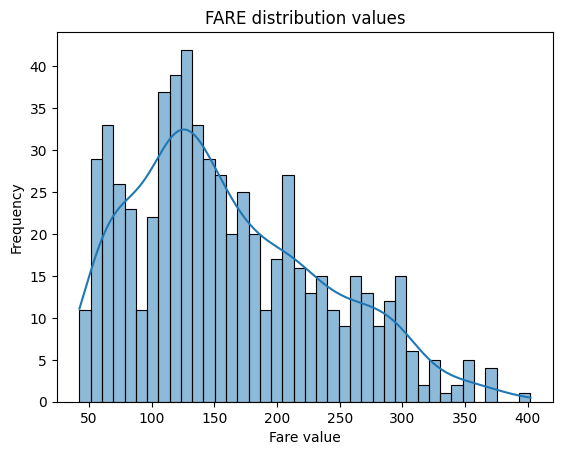

In [ ]:
sns.histplot(data['FARE'], bins=40, kde=True)
plt.title("FARE distribution values")
plt.xlabel("Fare value")
plt.ylabel("Frequency")
plt.show()

>  2. **(d) (5) Describe the shape of the `FARE` variable.**

The shape of the variable is positively skewed having a single peak with long tail suggesting the presence of outliers.
This suggest that most fares concentrated at lower values and a gradual reduction towards higher values.

>  2. **(e) (5) Visualize the distribution of the `VACATION` variable.**

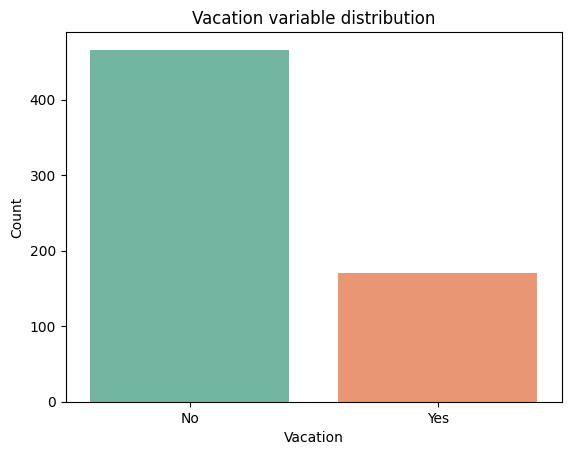

In [ ]:
sns.countplot(x="VACATION", hue="VACATION", data=data, palette="Set2", legend=False)
plt.title("Vacation variable distribution")
plt.xlabel("Vacation")
plt.ylabel("Count")
plt.show()

>  2. **(f) (5) Describe the distribution of the `VACATION` variable.**

The distribution is imbalanced with routes not for vacation having a high number than the vacation routes suggesting most airline routes in the dataset are non-vacation related.



---



>  3. **(a) (15) Next, you will use imputation to handle misingness. For numerical variables, impute the median. For categorical variables, impute the mode. Be sure to apply your changes to the `data` dataframe. Then, output dataframe information to confirm the transformation.**

In [ ]:
num_vars=data.select_dtypes(include=['int64','float64']).columns.tolist()
cat_vars=data.select_dtypes(include=['category']).columns.tolist()

for col in numeric_vars:
    data[col] = data[col].fillna(data[col].median())

for col in cat_vars:
    data[col] = data[col].fillna(data[col].mode()[0])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   S_CODE    638 non-null    category
 1   S_CITY    638 non-null    category
 2   E_CODE    638 non-null    category
 3   E_CITY    638 non-null    category
 4   COUPON    638 non-null    float64 
 5   NEW       638 non-null    float64 
 6   VACATION  638 non-null    category
 7   SW        638 non-null    category
 8   HI        638 non-null    float64 
 9   S_INCOME  638 non-null    int64   
 10  E_INCOME  638 non-null    int64   
 11  S_POP     638 non-null    int64   
 12  E_POP     638 non-null    float64 
 13  SLOT      638 non-null    category
 14  GATE      638 non-null    category
 15  DISTANCE  638 non-null    float64 
 16  PAX       638 non-null    int64   
 17  FARE      638 non-null    float64 
dtypes: category(8), float64(6), int64(4)
memory usage: 61.2 KB




---



>  3. **(b) (10) Next, rescale your numerical variables using Min-Max normalization. Then, output the first 5 observations of the `data` dataframe to preview the transformation.**

In [ ]:
num_vars=data.select_dtypes(include=['int64','float64']).columns.tolist()
scaler = MinMaxScaler()
data[num_vars] = scaler.fit_transform(data[num_vars])
data.head()

,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,*,Dallas/Fort Worth TX,*,Amarillo TX,0.00000,1.0,No,Yes,0.463139,0.579730,0.268946,0.333128,0.010506,Free,Free,0.074717,0.087860,0.060186
1,*,Atlanta GA,*,Baltimore/Wash Intl MD,0.06383,1.0,No,No,0.477641,0.511832,0.629331,0.388071,0.786437,Free,Free,0.174340,0.101066,0.367126
2,*,Boston MA,*,Baltimore/Wash Intl MD,0.06383,1.0,No,No,0.907096,0.641143,0.629331,0.637858,0.786437,Free,Free,0.094340,0.068354,0.459714
3,ORD,Chicago IL,*,Baltimore/Wash Intl MD,0.06383,1.0,No,Yes,0.162708,0.605460,0.629331,0.864202,0.786437,Controlled,Free,0.187925,0.326573,0.119594
4,MDW,Chicago IL,*,Baltimore/Wash Intl MD,0.06383,1.0,No,Yes,0.162708,0.605460,0.629331,0.864202,0.786437,Free,Free,0.187925,0.326573,0.119594




---



>  4. **(10) Finally, transform your categorical variables using one-hot encoding. Create a new dataframe, named `data_ohe`, which contains your transformed numerical variables and the one-hot encoded categorical variables. Then, preview the last 5 rows of the `data_ohe` dataframe to preview the transformation.**

In [ ]:
cat_vars=data.select_dtypes(include=['category']).columns.tolist()
data_ohe = pd.get_dummies(data, columns=cat_vars)
data_ohe.tail()

,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE,...,E_CITY_Washington DC,E_CITY_West Palm Beach FL,VACATION_No,VACATION_Yes,SW_No,SW_Yes,SLOT_Controlled,SLOT_Free,GATE_Constrained,GATE_Free
633,0.085106,1.0,0.112460,0.759551,0.94061,0.951812,0.098383,0.345660,0.453390,0.242414,...,False,True,False,True,True,False,True,False,False,True
634,0.085106,1.0,0.112460,0.759551,0.94061,0.951812,0.098383,0.345660,0.453390,0.242414,...,False,True,False,True,True,False,False,True,True,False
635,0.180851,1.0,0.634849,0.553174,0.94061,0.544912,0.098383,0.319245,0.062331,0.229175,...,False,True,False,True,True,False,False,True,False,True
636,0.297872,1.0,0.494434,0.717838,0.94061,0.500756,0.098383,0.280755,0.046596,0.242386,...,False,True,False,True,True,False,False,True,False,True
637,0.297872,1.0,0.494434,0.717838,0.94061,0.500756,0.098383,0.280755,0.046596,0.242386,...,False,True,False,True,True,False,True,False,False,True




---

